In [2]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import re

In [3]:
df = pd.read_csv('fake_news_dataset.csv')

In [3]:
df.head(3)

,date,source,title,text,author,language,location,site_url,img_url,subject,author_title,state,party_affiliation,barely_true,false,half_true,mostly_true,on_fire,label
0,4/5/2017,nna,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,NaN,English,idlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conspiracy
1,4/7/2017,nna,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,NaN,English,homs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conspiracy
2,4/16/2017,nna,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,NaN,English,aleppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conspiracy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11347 entries, 0 to 11346
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1078 non-null   object 
 1   source             802 non-null    object 
 2   title              1078 non-null   object 
 3   text               11347 non-null  object 
 4   author             10539 non-null  object 
 5   language           1078 non-null   object 
 6   location           10965 non-null  object 
 7   site_url           276 non-null    object 
 8   img_url            276 non-null    object 
 9   subject            10263 non-null  object 
 10  author_title       7362 non-null   object 
 11  state              8053 non-null   object 
 12  party_affiliation  10263 non-null  object 
 13  barely_true        10263 non-null  float64
 14  false              10263 non-null  float64
 15  half_true          10263 non-null  float64
 16  mostly_true        102

In [5]:
df_1 = df.copy()

In [6]:
# Seperate the date columns and reorder them

In [7]:
df_1[['date','month','year']] = df_1['date'].str.split('/',expand=True)

In [8]:
df_1 = df_1[['date','month','year', 'source', 'title', 'text', 'author', 'language', 'location',
       'site_url', 'img_url', 'subject', 'author_title', 'state',
       'party_affiliation', 'barely_true', 'false', 'half_true', 'mostly_true',
       'on_fire', 'label']]

df_1.rename(columns={'date':'day'},inplace=True)
df_1.head(3)

,day,month,year,source,title,text,author,language,location,site_url,...,subject,author_title,state,party_affiliation,barely_true,false,half_true,mostly_true,on_fire,label
0,4,5,2017,nna,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,NaN,English,idlib,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conspiracy
1,4,7,2017,nna,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,NaN,English,homs,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conspiracy
2,4,16,2017,nna,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,NaN,English,aleppo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conspiracy


In [9]:
# Fill languge column 'English'
df_1.language.fillna('English',inplace=True)
df_1.language.replace({'english':'English'},inplace=True)
df_1.isnull().sum()

day                  10269
month                10269
year                 10269
source               10545
title                10269
text                     0
author                 808
language                 0
location               382
site_url             11071
img_url              11071
subject               1084
author_title          3985
state                 3294
party_affiliation     1084
barely_true           1084
false                 1084
half_true             1084
mostly_true           1084
on_fire               1084
label                    0
dtype: int64

In [10]:
# Fill dayth column with mode
df_1.day.fillna(df_1.day.mode()[0],inplace=True)
df_1.month.fillna(df_1.month.mode()[0],inplace=True)
df_1.year.fillna(df_1.year.mode()[0],inplace=True)

In [11]:
# fill source with 'politifact'
df_1.source.fillna('politifact',inplace=True)

In [12]:
# fill author with 'anonymous'
df_1.author.fillna('anonymous',inplace=True)

In [13]:
# fill location with 'unknown'
df_1.location.fillna('unknown',inplace=True)

In [14]:
# fill site_url with  mode value
df_1.site_url.fillna(df_1.site_url.mode()[0],inplace=True)
df_1.img_url.fillna(df_1.img_url.mode()[0],inplace=True)

In [15]:
# fill subject with 'for'
df_1.subject.fillna('foreign',inplace=True)

In [16]:
df_1.author_title.fillna('not_specified',inplace=True)

In [17]:
df_1.state.fillna('Unknown',inplace=True)

In [18]:
df_1.party_affiliation.fillna('none',inplace=True)

In [19]:
df_1.isnull().sum()

day                      0
month                    0
year                     0
source                   0
title                10269
text                     0
author                   0
language                 0
location                 0
site_url                 0
img_url                  0
subject                  0
author_title             0
state                    0
party_affiliation        0
barely_true           1084
false                 1084
half_true             1084
mostly_true           1084
on_fire               1084
label                    0
dtype: int64

In [20]:
df_1['barely_true'].fillna(method='backfill',inplace=True)
df_1['false'].fillna(method='backfill',inplace=True)
df_1['half_true'].fillna(method='backfill',inplace=True)
df_1['mostly_true'].fillna(method='backfill',inplace=True)
df_1['on_fire'].fillna(method='backfill',inplace=True)

In [21]:
df_1.label.value_counts()

label
half-true      2123
false          1998
mostly-true    1966
true           1683
barely-true    1657
on-fire         842
conspiracy      500
bias            461
bs              115
fake              2
Name: count, dtype: int64

In [22]:
# df_1['title'] = df_1.apply(lambda x: 
#                                  x.subject if pd.isna(x.text) else x.title,axis=1)

# df_1['title'].fillna(df_1['text'].apply(
#     lambda x: x.split('.')[0] if pd.notnull(x) else x),
#                         inplace=True)

df_1['title'].fillna(df_1['text'].apply(
    lambda text: re.match(r'([A-Z][^\.!?]*[\.!?])', text).group(1) if pd.isna(text) else text), inplace=True)

In [23]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11347 entries, 0 to 11346
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                11347 non-null  object 
 1   month              11347 non-null  object 
 2   year               11347 non-null  object 
 3   source             11347 non-null  object 
 4   title              11347 non-null  object 
 5   text               11347 non-null  object 
 6   author             11347 non-null  object 
 7   language           11347 non-null  object 
 8   location           11347 non-null  object 
 9   site_url           11347 non-null  object 
 10  img_url            11347 non-null  object 
 11  subject            11347 non-null  object 
 12  author_title       11347 non-null  object 
 13  state              11347 non-null  object 
 14  party_affiliation  11347 non-null  object 
 15  barely_true        11347 non-null  float64
 16  false              113

In [24]:
df_1['label'].replace(['half-true','bias'],'conspiracy', inplace=True)
df_1['label'].replace(['true','mostly-true','on-fire'],'genuine', inplace=True)
df_1['label'].replace(['bs','barely-true','false'],'fake', inplace=True)

In [25]:
df_1.label.value_counts()

label
genuine       4491
fake          3772
conspiracy    3084
Name: count, dtype: int64

In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11347 entries, 0 to 11346
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                11347 non-null  object 
 1   month              11347 non-null  object 
 2   year               11347 non-null  object 
 3   source             11347 non-null  object 
 4   title              11347 non-null  object 
 5   text               11347 non-null  object 
 6   author             11347 non-null  object 
 7   language           11347 non-null  object 
 8   location           11347 non-null  object 
 9   site_url           11347 non-null  object 
 10  img_url            11347 non-null  object 
 11  subject            11347 non-null  object 
 12  author_title       11347 non-null  object 
 13  state              11347 non-null  object 
 14  party_affiliation  11347 non-null  object 
 15  barely_true        11347 non-null  float64
 16  false              113

In [28]:
df_1.head(3)

,day,month,year,source,title,text,author,language,location,site_url,...,subject,author_title,state,party_affiliation,barely_true,false,half_true,mostly_true,on_fire,label
0,4,5,2017,nna,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,anonymous,English,idlib,activistpost.com,...,foreign,not_specified,Unknown,none,0.0,1.0,0.0,0.0,0.0,conspiracy
1,4,7,2017,nna,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,anonymous,English,homs,activistpost.com,...,foreign,not_specified,Unknown,none,0.0,1.0,0.0,0.0,0.0,conspiracy
2,4,16,2017,nna,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,anonymous,English,aleppo,activistpost.com,...,foreign,not_specified,Unknown,none,0.0,1.0,0.0,0.0,0.0,conspiracy


In [27]:
df_1.isna().sum()

day                  0
month                0
year                 0
source               0
title                0
text                 0
author               0
language             0
location             0
site_url             0
img_url              0
subject              0
author_title         0
state                0
party_affiliation    0
barely_true          0
false                0
half_true            0
mostly_true          0
on_fire              0
label                0
dtype: int64

In [33]:
l = []
l2 = []
for i in range(0,len(df_1.text)):
    x = len(df_1.title[i])
    l.append(x)

In [35]:
df_1.to_csv('df_2.csv',index=False)

---

## EDA

In [10]:
df.label.unique()

array(['conspiracy', 'fake', 'genuine'], dtype=object)

Text(0.5, 1.0, 'Value Counts of Target Variable')

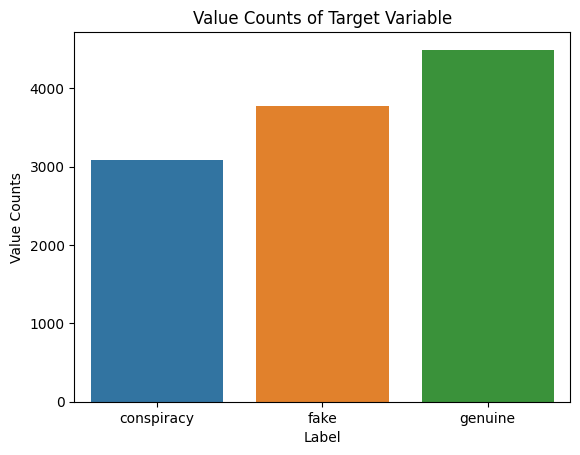

In [17]:
sns.countplot(df,x='label')
plt.xlabel('Label')
plt.ylabel('Value Counts')
plt.title("Value Counts of Target Variable")

In [9]:
df.label.value_counts()

label
genuine       4491
fake          3772
conspiracy    3084
Name: count, dtype: int64

/home/musthu/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


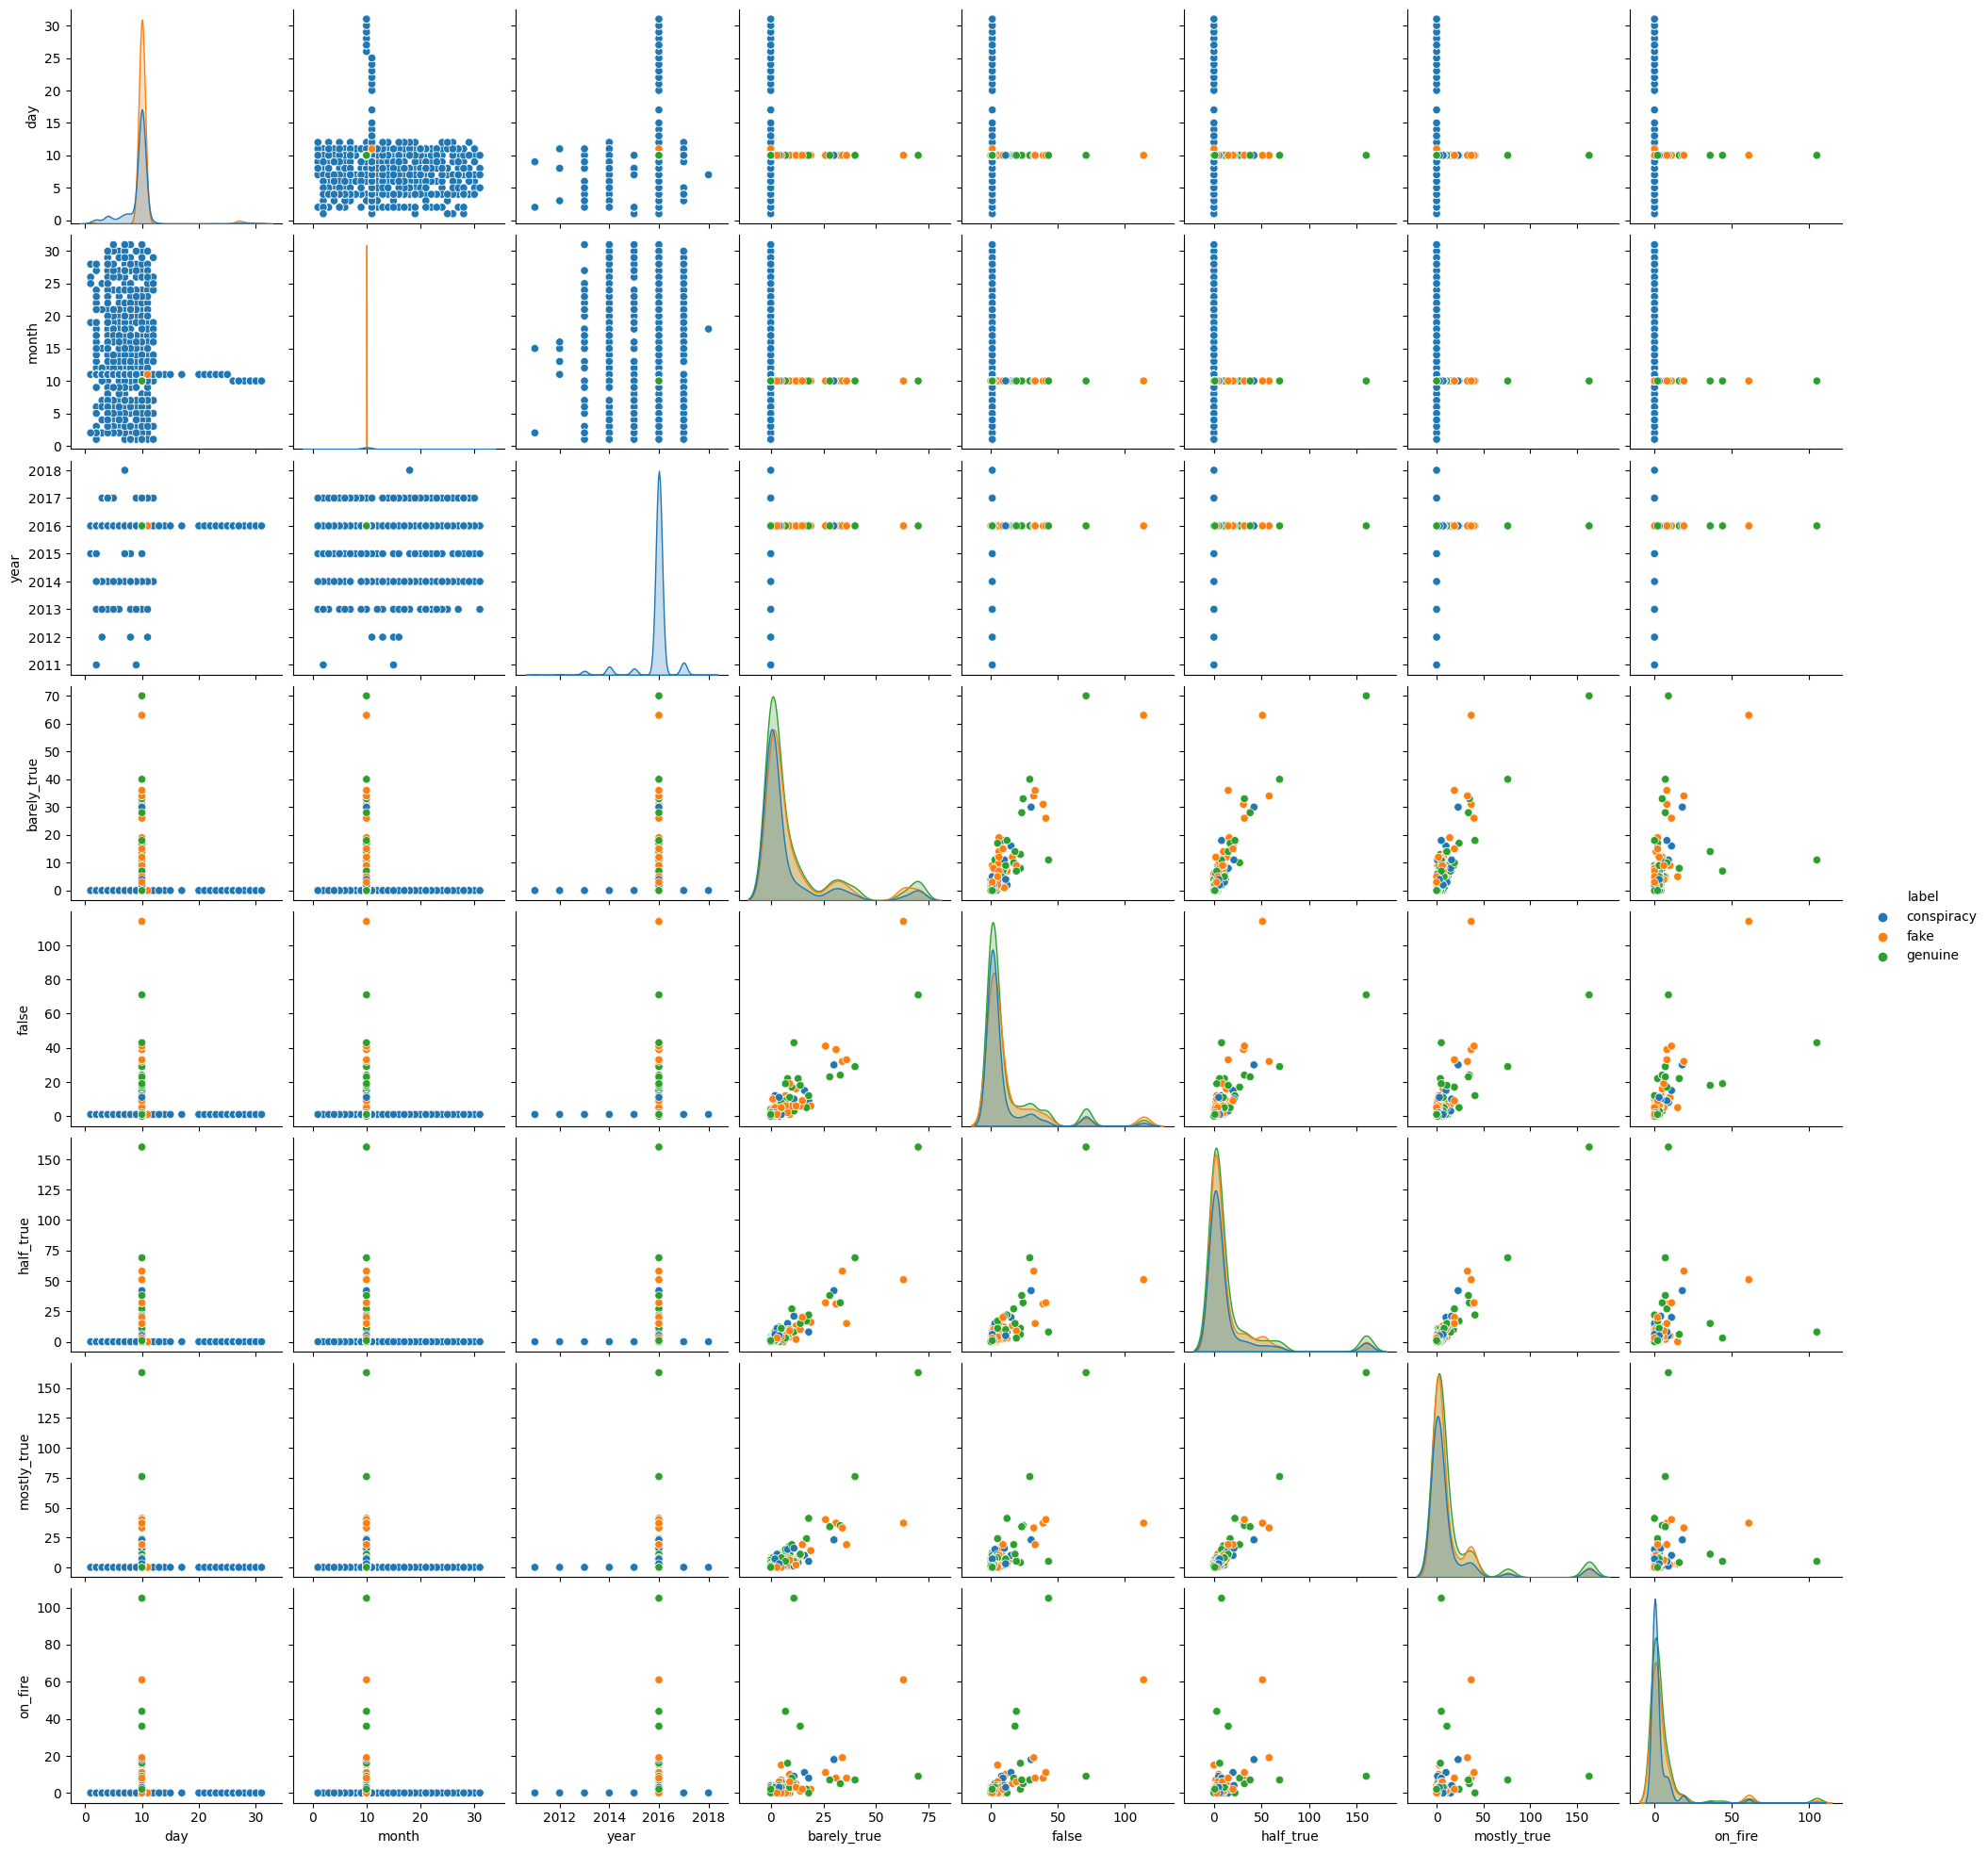

In [6]:
sns.pairplot(df, hue='label')

---

In [ ]:
# Sample data
data = {'A': [1, None, 3, None, 5], 'B': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Fill missing values in column 'A' with a new value based on a condition in column 'B'
new_value = 999
condition_value = 40
df.loc[df['B'] == condition_value, 'A'] = df.loc[df['B'] == condition_value, 'A'].fillna(new_value)

print(df)

In [ ]:
data = {'A': [1, 2, 3, None, 5], 'B': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Fill missing values in column 'A' based on condition from column 'B'
df['A'] = df.apply(lambda row: row['B'] if pd.isna(row['A']) else row['A'], axis=1)

print(df)

In [ ]:
# import pandas as pd
# import re

# # Assuming df_1 is your DataFrame
# # Define a function to extract the first sentence from the text
# def extract_first_sentence(text):
#     # Use regular expression to match the first sentence
#     match = re.match(r'([A-Z].*?)[.!?]\s', text)
#     if match:
#         return match.group(1)
#     else:
#         return text  # Return the original text if no proper sentence found

# # Fill null values in 'title' with the first sentence of 'text'
# df_1['title'] = df_1['title'].fillna(df_1['text'].apply(extract_first_sentence))